# Load the data

In [1]:
import pandas as pd
df = pd.read_csv('dataset/critiques.csv', sep='~')
df.head()

,id,id_film,auteur,date,note,contenu,likes,dislikes
0,1,274347,I&#039;m A Rocket Man,17-08-2022,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,1,0
1,2,274347,Spider cineman,4-01-2025,3.5,Drame familial lié à la drogue ça aurait pu êt...,1,0
2,3,274347,Marc de Georgi,10-01-2022,2.5,La bonne interprétation des actrices principal...,1,1
3,4,274347,Ciné-13,20-09-2021,3.0,C'est l'apparente sincérité des dialogues qui ...,1,0
4,5,274347,ffred,10-03-2022,3.5,J’ai toujours eu une tendresse particulière po...,0,0


In [2]:
films_df = pd.read_csv('dataset/films.csv', sep='~')
films_df.head()

,id,url,titre,synopsis,public,note_presse,nb_notes_presse,nb_critiques_presse,note_spectateurs,nb_notes_spectateurs,nb_critiques_spectateurs,date,duree,distributeur,recompenses,type,box_office_france,langues,couleur,nationalite
0,42303,https://www.allocine.fr//film/fichefilm_gen_cf...,Permis de construire,"Dentiste à Paris, Romain vient de perdre son p...",NaN,1.8,4.0,4.0,2.5,2195.0,343.0,9-03-2022,93.0,Warner Bros. France,0,Long métrage,562816.0,Français,Couleur,France
1,49021,https://www.allocine.fr//film/fichefilm_gen_cf...,Nine Days,Dans une maison éloignée de la civilisation vi...,NaN,NaN,NaN,NaN,3.4,51.0,4.0,27-02-2022,124.0,NaN,0,Long métrage,NaN,Anglais,Couleur,U.S.A.
2,51266,https://www.allocine.fr//film/fichefilm_gen_cf...,Trop d'amour,"Frankie, jeune réalisatrice, est fascinée par ...",NaN,NaN,NaN,NaN,3.1,69.0,18.0,9-11-2021,NaN,NaN,0,Long métrage,NaN,Français,Couleur,France
3,52576,https://www.allocine.fr//film/fichefilm_gen_cf...,L'Ultime sacrifice,L'histoire vraie d'un homme infiltré dans les ...,NaN,NaN,NaN,NaN,3.7,282.0,20.0,3-08-2020,115.0,NaN,0,Long métrage,NaN,Anglais,Couleur,U.S.A.
4,74720,https://www.allocine.fr//film/fichefilm_gen_cf...,Resistance,"Durant la Seconde Guerre mondiale, en 1942, Ma...",NaN,NaN,NaN,NaN,3.8,822.0,57.0,25-11-2020,122.0,Originals Factory,0,Long métrage,NaN,Anglais,Couleur,NaN


# Récuperer le titre du film pour chaque critiques

In [3]:
titres = []
for i in range(df.shape[0]):
    id_film = df['id_film'].iloc[i]
    film = films_df[films_df['id'] == id_film]  # Correct filtering
    if not film.empty:
        titres.append(film['titre'].iloc[0])  # Extract the title safely
    else:
        print('missing title')
        titres.append("")  # Append None if no match is found

In [4]:
df['titre'] = titres
df.head(2)

,id,id_film,auteur,date,note,contenu,likes,dislikes,titre
0,1,274347,I&#039;m A Rocket Man,17-08-2022,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,1,0,Four Good Days
1,2,274347,Spider cineman,4-01-2025,3.5,Drame familial lié à la drogue ça aurait pu êt...,1,0,Four Good Days


In [5]:
# suppression de url 
df.drop(columns=[col for col in df.columns if col not in ['titre', 'note', 'contenu']], inplace=True)
df.head(2)

,note,contenu,titre
0,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,Four Good Days
1,3.5,Drame familial lié à la drogue ça aurait pu êt...,Four Good Days


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14014 entries, 0 to 14013
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   note     14014 non-null  float64
 1   contenu  14014 non-null  object 
 2   titre    14014 non-null  object 
dtypes: float64(1), object(2)
memory usage: 328.6+ KB


100 000 commentaires

# Preprocessing

Pour l'analyse voir `Visualisation_data/data_cleaning.ipynb` (Henri)

In [7]:
def count_nb_words(sentence):
    return len(sentence.split())

df['nb_mots_commentaire'] = df['contenu'].map(count_nb_words)

In [8]:
df.head(2)

,note,contenu,titre,nb_mots_commentaire
0,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,Four Good Days,117
1,3.5,Drame familial lié à la drogue ça aurait pu êt...,Four Good Days,45


<Figure size 1000x600 with 0 Axes>

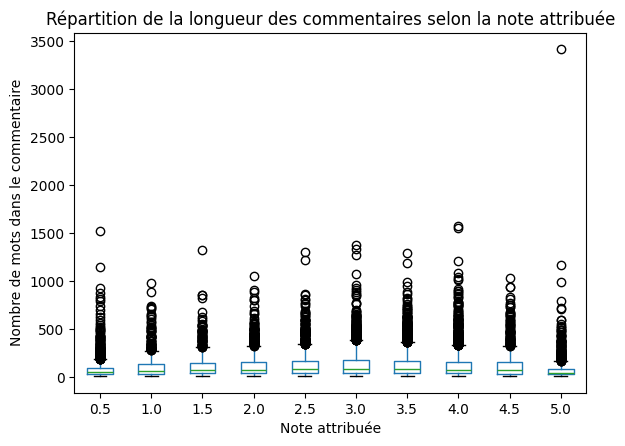

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.boxplot(column='nb_mots_commentaire', by='note', grid=False)

# Modification du titre et des labels
plt.title("Répartition de la longueur des commentaires selon la note attribuée")
plt.suptitle("")  # Supprime le titre automatique de Pandas
plt.xlabel("Note attribuée")
plt.ylabel("Nombre de mots dans le commentaire")

# Affichage du graphique
plt.show()


array([[<Axes: title={'center': 'nb_mots_commentaire'}>]], dtype=object)

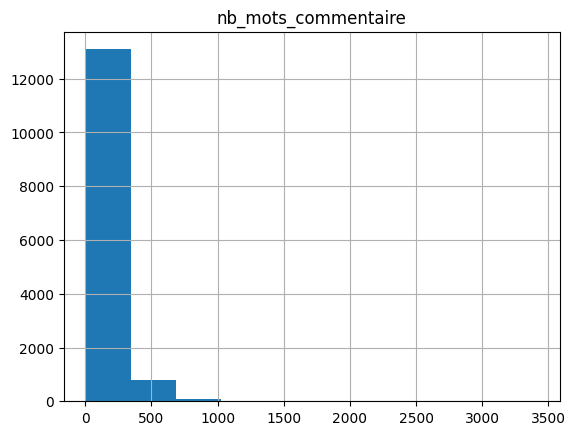

In [10]:
# distribution
df.hist('nb_mots_commentaire')

In [11]:
df['contenu'].iloc[0]

"Oh my God ! Ce film est le meilleur que j'ai jamais vu sur les addictions aux drogues... mais en même temps avec Glenn Close au casting ca se pouvait que... encore une fois elle démontre ici son immense talent et son immense sensibilité & elle campe cette mère désabusée qui tente de venir en aide à sa fille toxico avec brio et classe ! Mais en même temps Mila Kunis n'a rien à lui envier tant elle est habitée par son rôle de Molly ! C'est beau, c'est triste, c'est effrayant mais surtout terriblement touchant et moi je n'ai pas vu le temps passer en regardant le combat de Molly contre sa dépendance ! Bravo bravo..."

In [12]:
df['contenu'].iloc[1]

'Drame familial lié à la drogue ça aurait pu être un film assez banal compte tenu du scénario assez classique, il est relevé de manière magistrale par une interprétation remarquable du casting. Cela donne un très bon film marquant sur le sujet. Une bonne surprise'

In [13]:
df['contenu'].iloc[2]

"La bonne interprétation des actrices principales fait fonctionner ce petit film sur les ravages de la drogue et le sevrage pour le reste c'est sans surprise."

In [14]:
df['contenu'].iloc[3]

"C'est l'apparente sincérité des dialogues qui prime.Petit budget genre film TV.Mais Glenn CLOSE fait le taf...Mais c'est trop classique!"

## Suppression des sous-phrases faisant référence à des blogs / sites internet

Certains sous-contenus des commentaires sont inutilisés et n’expriment pas de sentiments, notamment lorsque l’utilisateur qui commente fait référence à son blog pour voir la critique complète.

**Idée :**
- Découper les commentaires en phrases.
- Supprimer les phrases qui contiennent des sites.

In [15]:
import re

def find_urls(sentence):
    """
        Full URLs (with http://, https://, or www.).
        Domains without prefixes (like example.com or site.fr).
        Avoid false positives (like word.with.dots or text...wrong).
    """
    url_pattern = re.compile(
        r'\b(?:https?://|www\.)?[a-zA-Z0-9.-]+\.(?:com|fr|net|org|io|co|info|biz|gov|edu|us|uk|jp|cn|in|br|es|it|nl|ru|ch|no|mil|eu|tv|me|xyz|online|tech|ly|gg|gl|to|tk|ml|cf|ga|gq)'
        r'(?:/[^\s]*)?\b',
        re.IGNORECASE
    )

    # Extract matches while ensuring valid URLs (avoiding false positives)
    urls = []
    for match in url_pattern.finditer(sentence):
        url = match.group()

        # Ignore matches that contain invalid cases (like "word...something")
        if "..." in url or url.endswith("."):
            continue  # Skip invalid matches

        # Trim trailing punctuation (like , ! ? ;)
        clean_url = url.rstrip('.,!?;')

        # Append with correct start and end positions
        urls.append((clean_url, match.start(), match.start() + len(clean_url)))

    return urls
    

# Example sentence
sentence = df['contenu'].iloc[0]

# Find URLs and their positions
urls_with_positions = find_urls(sentence)

# Print results
for url, start, end in urls_with_positions:
    print(f"URL: {url}, Start: {start}, End: {end}")


Problème : titre de film qui resemble à un url (i.e `Alibi.com`)

In [16]:
PUNCTS = ['.', '!', ';', '?']
def removeURL(sentence : str, titre : str)->str:
    sentence = sentence.replace('\n', ' ') # useless
    titre = titre.lower()
    urls_with_positions = find_urls(sentence)

    new_sentence = ""
    i, start = 0, 0
    containsUrl = False
    while i < len(sentence):
        j = 0
        while j < len(urls_with_positions):
            url, url_start, url_end = urls_with_positions[j]
            if url.lower() == titre: #Problème : titre de film qui resemble à un url (i.e `Alibi.com`)
                urls_with_positions = urls_with_positions[j+1:]   
            elif i < url_start:
                break
            elif i >= url_start and i < url_end:
                containsUrl = True
                i = url_end-1
                break
            elif i >= url_end:
                urls_with_positions = urls_with_positions[j+1:]
            else:
                j += 1
        
        if sentence[i] in PUNCTS:
           if not containsUrl:
            new_sentence += sentence[start:i+1]
           start = i+1
           containsUrl = False
           if not urls_with_positions:
                break

        i += 1
    
    if start != len(sentence) and not containsUrl:
        new_sentence += sentence[start:]
    # removed extra spaces 
    return " ".join(new_sentence.split())
    

In [17]:
# fake test
titre = 'Alibi.com' 
sentence = "J'ai adoré le film aliBI.com, je l'ai trouvé tres drole. Allez voir mon blog http//myblog.fr et n'hesitez pas a commenter. Le film est geniale; fakeurl.com tres bien ficelé; les acteurs juent bien et sont touchant"
print(removeURL(sentence, titre)) # update

J'ai adoré le film aliBI.com, je l'ai trouvé tres drole. Le film est geniale; les acteurs juent bien et sont touchant


In [18]:
sentence =  """Non vraiment Vinterberg c'est pas pour moi... Je trouve ça laid, idiot, grossier et totalement improbable. Je n'y crois pas à ses histoires.Là on parle de quatre enseignants et rien que le décor planté au début du film est est juste irréaliste. On a Mikkelsen qui raconte n'importe quoi à ses élèves alors qu'il est assis à son bureau pendant que personne ne l'écoute... Je ne suis pas expert en pédagogie danoise, mais c'est une vision de l'enseignement qui est datée, ça n'existe plus ça. Alors je sais qu'à ce moment du film il n'est pas censé être un bon prof, n'empêche que même le pire prof qui en a rien à foutre ne ferait pas ça.Mais le pire c'est la suite, il décide donc de picoler pour lâcher un peu prise et donne plus de vie à ses cours et on a des scènes encore plus improbables où son cours d'Histoire consiste à parler de gens qui picolent et à ne pas blâmer les alcooliques car Hitler lui ne l'était pas, mais Churchill si...Clairement, moi je vois cette scène je comprends qu'il est toujours un mauvais prof, mais qu'il est juste plus "enjoué" et donc ses élèves le suivent plus facilement dans ses délires. Mais à la fin du film les élèves ont un examen à passer, examen qu'ils semblent réussir à haut la main...Je suis désolé ça ne fonctionne pas...Tu ne peux pas d'un côté vouloir faire une sorte de film assez lugubre et réaliste sur des profs d'âge moyen à qui rien ne réussit dans la vie pour ensuite avoir une représentation de l'enseignement digne d'une série américaine où les profs semblent parler en aphorismes directement applicables dans la vie du héros... Il y a un problème de traitement.Et puis c'est très personnel, mais je m'emmerde devant ses films, là toute les parties qui se veulent tristes et dramatiques je trouve ça d'une bêtise absolue tant c'est juste des caricatures... (on a quand même un gars qui a une vie tellement merdique que ses gamins lui pissent littéralement dessus tous les soirs... amis de la subtilité et de la vraisemblance, bonsoir)Finalement ce que j'ai le plus apprécié c'est les moments d'euphorie, globalement le tout début et la toute fin du film et on ne va pas se le cacher, la musique y est pour beaucoup. (et globalement les choisies dans le film sont géniales)Quant au message du film, c'est assez ambigüe, parce que oui lorsqu'ils boivent trop ils ont des problèmes, mais ils avaient les mêmes problèmes avant... et la fin a beau être un peu euphorique, tout semble se régler comme par magie (sauf pour un) aucun problème n'a réellement été résolu, c'est juste un retour à la case départ.Sur les trois films de Vinterberg que j'ai c'est clairement le moins pire, parce que justement il y a quelques moments musicaux, enjoués, qui fonctionnent bien. Mais dès que ça part dans le drame, étant donné que je ne crois pas à l'histoire au départ, c'est juste une purge."""
print(removeURL(sentence, "")) # not update 

Non vraiment Vinterberg c'est pas pour moi... Je trouve ça laid, idiot, grossier et totalement improbable. Je n'y crois pas à ses histoires.Là on parle de quatre enseignants et rien que le décor planté au début du film est est juste irréaliste. On a Mikkelsen qui raconte n'importe quoi à ses élèves alors qu'il est assis à son bureau pendant que personne ne l'écoute... Je ne suis pas expert en pédagogie danoise, mais c'est une vision de l'enseignement qui est datée, ça n'existe plus ça. Alors je sais qu'à ce moment du film il n'est pas censé être un bon prof, n'empêche que même le pire prof qui en a rien à foutre ne ferait pas ça.Mais le pire c'est la suite, il décide donc de picoler pour lâcher un peu prise et donne plus de vie à ses cours et on a des scènes encore plus improbables où son cours d'Histoire consiste à parler de gens qui picolent et à ne pas blâmer les alcooliques car Hitler lui ne l'était pas, mais Churchill si...Clairement, moi je vois cette scène je comprends qu'il est

In [19]:
sentence = """Eva reçoit pour son anniversaire un calendrier de l’Avent un peu particulier. Ce dernier s’avère être maléfique et Eva se retrouve rapidement contrainte de se plier aux règles du jeu dicté par cet étrange calendrier qui va la faire basculer petit à petit vers le point de non-retour…Pour son second long-métrage, le réalisateur belge Patrick Ridremont nous entraîne dans un univers surnaturel confrontant Eva une nageuse tétraplégique et Ich un boogeyman qui baragouine en allemand ("Es ist mitternacht"). Eva accumule les malchances, elle a une vie de merde, non seulement elle est tétraplégique à la suite d’un accident de voiture mais en plus, elle vit seule, dans une ville où semble-t-il, tous les hommes sont des ratés (entre le dragueur lourdingue à la piscine, le boss macho et le violeur du bar). Mais bon, ça c’était jusqu’à ce qu’elle rencontre Ich qui va prendre un malin plaisir à inverser la tendance. La suite, dorénavant, vous la connaissez… (ou du moins, vous la devinez).S’il ne fallait retenir qu’une chose de ce petit film d’horreur, c’est bien la présence d’Eugénie Derouand, qui parvient à s’en sortir tant bien que mal. On sent que le film a été réalisé avec peu de moyen (la séquence de l’accident de voiture et le contrepoint avec le chien), réalisé en seulement 22 jours, cela ne laissait que peu de marge de manœuvre pour approfondir certaines scènes. Enfin, on préfèrera éviter de s’attarder sur les seconds rôles, tous caricaturés à outrance (la belle-mère, le boss, le violeur, …).Le cinéma de genre n’est pas chose aisé, il ne suffit pas d’avoir un high concept pour tenir pleinement en haleine les spectateurs et encore moins de lui infliger un placement de produit (After Eight®) plutôt grossier.► http://bit.ly/CinephileNostalGeek ★ http://twitter.com/B_Renger ◄"""
print(removeURL(sentence, "")) # update

Eva reçoit pour son anniversaire un calendrier de l’Avent un peu particulier. Ce dernier s’avère être maléfique et Eva se retrouve rapidement contrainte de se plier aux règles du jeu dicté par cet étrange calendrier qui va la faire basculer petit à petit vers le point de non-retour…Pour son second long-métrage, le réalisateur belge Patrick Ridremont nous entraîne dans un univers surnaturel confrontant Eva une nageuse tétraplégique et Ich un boogeyman qui baragouine en allemand ("Es ist mitternacht"). Eva accumule les malchances, elle a une vie de merde, non seulement elle est tétraplégique à la suite d’un accident de voiture mais en plus, elle vit seule, dans une ville où semble-t-il, tous les hommes sont des ratés (entre le dragueur lourdingue à la piscine, le boss macho et le violeur du bar). Mais bon, ça c’était jusqu’à ce qu’elle rencontre Ich qui va prendre un malin plaisir à inverser la tendance. La suite, dorénavant, vous la connaissez… (ou du moins, vous la devinez).S’il ne fal

In [20]:
# real test
sentence, titre = df['contenu'].iloc[0], df['titre'].iloc[0]
print(removeURL(sentence, titre)) # update

Oh my God ! Ce film est le meilleur que j'ai jamais vu sur les addictions aux drogues... mais en même temps avec Glenn Close au casting ca se pouvait que... encore une fois elle démontre ici son immense talent et son immense sensibilité & elle campe cette mère désabusée qui tente de venir en aide à sa fille toxico avec brio et classe ! Mais en même temps Mila Kunis n'a rien à lui envier tant elle est habitée par son rôle de Molly ! C'est beau, c'est triste, c'est effrayant mais surtout terriblement touchant et moi je n'ai pas vu le temps passer en regardant le combat de Molly contre sa dépendance ! Bravo bravo...


In [21]:
# apply 
from tqdm import tqdm
df['old_nb_mots_commentaire'] = df['nb_mots_commentaire'].copy()
reduced_commentaires, new_nb_mots = [], []
for i in tqdm(range(df.shape[0])):
    sentence, titre = df['contenu'].iloc[i], df['titre'].iloc[i]
    new_sentence = removeURL(sentence, titre)
    reduced_commentaires.append(new_sentence)
    new_nb_mots.append(len(new_sentence.split()))

df['nb_mots_commentaire'] = new_nb_mots
df['contenu'] = reduced_commentaires

100%|██████████| 14014/14014 [00:00<00:00, 15236.84it/s]


In [22]:
df.head(2)

,note,contenu,titre,nb_mots_commentaire,old_nb_mots_commentaire
0,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,Four Good Days,117,117
1,3.5,Drame familial lié à la drogue ça aurait pu êt...,Four Good Days,45,45


In [23]:
print('Mean nb mots avant', df['old_nb_mots_commentaire'].mean())
print('Mean nb mots après', df['nb_mots_commentaire'].mean())

Mean nb mots avant 117.66076780362495
Mean nb mots après 117.4657485371771


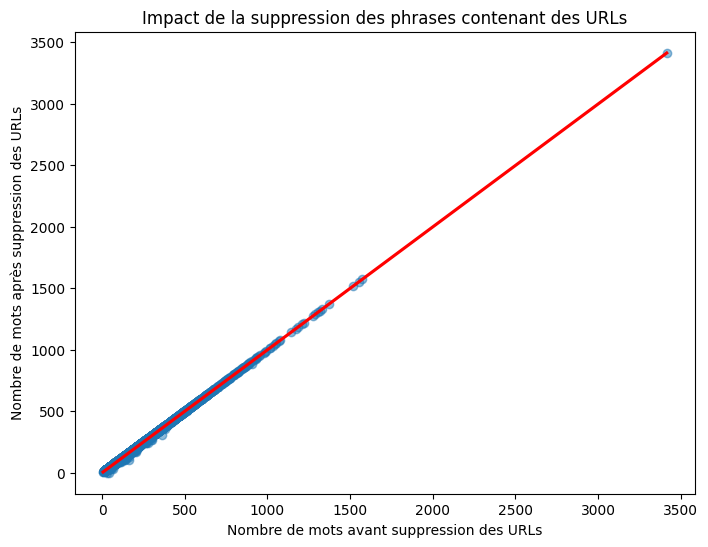

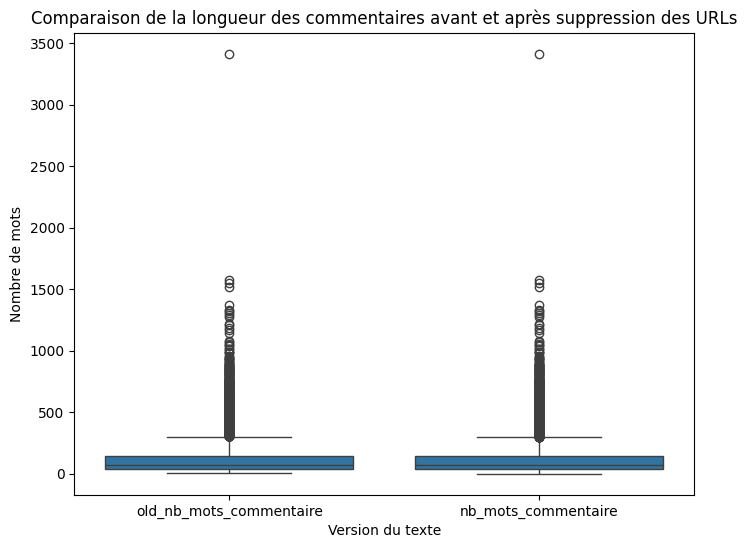

In [24]:
import seaborn as sns

# Création d'un scatter plot avec ligne de tendance
plt.figure(figsize=(8, 6))
sns.regplot(x=df["old_nb_mots_commentaire"], y=df["nb_mots_commentaire"], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.xlabel("Nombre de mots avant suppression des URLs")
plt.ylabel("Nombre de mots après suppression des URLs")
plt.title("Impact de la suppression des phrases contenant des URLs")

# Affichage du scatter plot
plt.show()

# Création d'un boxplot pour comparer la distribution avant/après
plt.figure(figsize=(8, 6))
df_melted = df.melt(value_vars=["old_nb_mots_commentaire", "nb_mots_commentaire"], var_name="Version", value_name="Nombre de mots")
sns.boxplot(x="Version", y="Nombre de mots", data=df_melted)
plt.xlabel("Version du texte")
plt.ylabel("Nombre de mots")
plt.title("Comparaison de la longueur des commentaires avant et après suppression des URLs")

# Affichage du boxplot
plt.show()


**On observe une réduction très légère, mais néanmoins appréciable.**
- Cela s'explique par le fait que très peu de personnes font référence à un site.
- Et lorsque c'est le cas, rares sont ceux qui mettent en avant leur site dès le début d'une phrase (par exemple : 'Allez voir ...url'). La plupart du temps, l'URL est simplement ajoutée à la fin du commentaire.

In [25]:
df.drop(columns=['old_nb_mots_commentaire'], inplace=True)

## Ajout d'espace entre les ponctuations et les mots

In [26]:
df.head()

,note,contenu,titre,nb_mots_commentaire
0,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,Four Good Days,117
1,3.5,Drame familial lié à la drogue ça aurait pu êt...,Four Good Days,45
2,2.5,La bonne interprétation des actrices principal...,Four Good Days,26
3,3.0,C'est l'apparente sincérité des dialogues qui ...,Four Good Days,19
4,3.5,J’ai toujours eu une tendresse particulière po...,Four Good Days,104


In [27]:
PUNCTS = ['.', '!', ';', '?']
def separePunct(sentence : str)->str:
    for punct in PUNCTS:
        sentence = sentence.replace(punct, f" {punct} ")
    # supprimer les espaces en trop
    return " ".join(sentence.split())

In [28]:
# apply 
df['old_nb_mots_commentaire'] = df['nb_mots_commentaire'].copy()
reduced_commentaires, new_nb_mots = [], []
for i in tqdm(range(df.shape[0])):
    sentence = df['contenu'].iloc[i] 
    new_sentence = separePunct(sentence)
    reduced_commentaires.append(new_sentence)
    new_nb_mots.append(len(new_sentence.split()))

df['nb_mots_commentaire'] = new_nb_mots
df['contenu'] = reduced_commentaires

  0%|          | 0/14014 [00:00<?, ?it/s]

100%|██████████| 14014/14014 [00:00<00:00, 49384.88it/s]


In [29]:
print('Mean nb mots avant', df['old_nb_mots_commentaire'].mean())
print('Mean nb mots après', df['nb_mots_commentaire'].mean())

Mean nb mots avant 117.4657485371771
Mean nb mots après 125.17175681461396


## Suppression / réduction des critiques trop longues

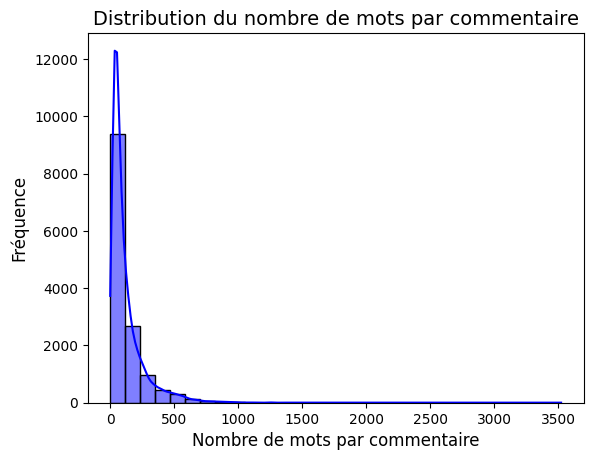

In [30]:
# Tracer un histogramme détaillé avec Seaborn
sns.histplot(df["nb_mots_commentaire"], bins=30, kde=True, color="blue", edgecolor="black")

# Ajouter des titres et labels
plt.title("Distribution du nombre de mots par commentaire", fontsize=14)
plt.xlabel("Nombre de mots par commentaire", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

# Afficher le graphique
plt.show()


## Idée :
- Les critiques trop longues (disons > `400` mots) sont écartées.
- Cependant, pour ne pas perdre trop d'informations, les critiques longues, si elles sont bien écrites, disposent parfois d'un résumé ou d'une conclusion.
- Peut-on généraliser cette approche et conserver les parties résumées des critiques trop longues comme nouvelles critiques ?

### Réduction

In [31]:
RESUME_TRIGGERS = ['en résumé', 'en conclusion', 'pour conclure']
def resumeCritique(sentence: str)->str:
    lsentence = sentence.lower()
    for trigger in RESUME_TRIGGERS:
        index = lsentence.find(trigger)
        if index != -1:
            return sentence[index:]
    return sentence

In [32]:
# apply 
# apply 
from tqdm import tqdm
df['old_nb_mots_commentaire'] = df['nb_mots_commentaire'].copy()
reduced_commentaires, new_nb_mots = [], []
max = 400
count, resume_count = 0, 0
for i in tqdm(range(df.shape[0])):
    nb_mot = df['nb_mots_commentaire'].iloc[i]
    critique = df['contenu'].iloc[i]
    if nb_mot > max:
        count += 1
        new_critique = resumeCritique(critique)
        new_nb_mot = len(new_critique.split())
        if new_nb_mot != nb_mot:
            resume_count += 1
            print('-'*100)
            print('critique de base :', critique)
            print('critique après réduction :', new_critique)
        critique = new_critique
        nb_mot = new_nb_mot

    reduced_commentaires.append(critique)
    new_nb_mots.append(nb_mot)

df['nb_mots_commentaire'] = new_nb_mots
df['contenu'] = reduced_commentaires

print('Nombre de critiques trop longues :', count)
print(f"Nombre de critiques trop longues réduites : {(resume_count * 100) / count}%")


  0%|          | 0/14014 [00:00<?, ?it/s]

----------------------------------------------------------------------------------------------------
critique de base : Je n'irai pas par quatre chemins, j'ai absolument détesté ce film . Pourquoi ? Et bien c'est simple . Si le concept peut être intéressant, le film en fait absolument n'importe quoi et ne sait jamais où il va . L'affiche fait penser à quelque chose de sulfureux, (bref, l'argument habituel), alors qu'en fait ce n'est qu'un pauvre navet à l'eau de rose, un banal film érotique à la 50 nuances, avec tous ses clichés et ses tares . Déjà, c'est très mal joué, et surtout beaucoup trop cliché spoiler: (les présentations des deux protagonistes sont grossières, on a l'impression d'être dans un mauvais téléfilm) . Car oui, être beau gosse ne suffit pas, encore faut-il savoir en jouer spoiler: (par exemple, la scène où Massimo révèle pourquoi il a enlevé Laura est tout bonnement ridicule, on se croirait aux pires heures de Twilight) . Le scénario est nul, le métrage se contredisan

100%|██████████| 14014/14014 [00:00<00:00, 88587.66it/s]


----------------------------------------------------------------------------------------------------
critique de base : Franchement je ne comprends pas toutes les critiques négatives à l’encontre de ce film . Le message qu’il défendait ne m’attirait pas du tout, car je le trouvais déjà rebattu, depuis bien longtemps . Qu’est-ce que j’ai donc pensé de The Prom au-delà de son message bien politiquement correct ? Eh bien, franchement, cette nouvelle comédie-musicale est magistrale . Elle est au contraire le remède et la douceur dont nous avions tant besoin, après cette période difficile . Et c'est d'ailleurs l'un des pari du film : essayer de nous faire oublier la morosité de l'année, pendant deux heures, de magie exceptionnelle . Ryan Murphy (le créateur de Hollywood, Ratched et Glee) a réuni une des plus prestigieuses distributions que j’ai pu voir depuis ces années . Et qui plut est spécialisée dans le genre : Meryl Streep (Couronner à juste titre reine des comédies-musicales, par le L

In [33]:
df.head()

,note,contenu,titre,nb_mots_commentaire,old_nb_mots_commentaire
0,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,Four Good Days,126,126
1,3.5,Drame familial lié à la drogue ça aurait pu êt...,Four Good Days,47,47
2,2.5,La bonne interprétation des actrices principal...,Four Good Days,27,27
3,3.0,C'est l'apparente sincérité des dialogues qui ...,Four Good Days,28,28
4,3.5,J’ai toujours eu une tendresse particulière po...,Four Good Days,110,110


In [34]:
print('Mean nb mots avant', df['old_nb_mots_commentaire'].mean())
print('Mean nb mots après', df['nb_mots_commentaire'].mean())

Mean nb mots avant 125.17175681461396
Mean nb mots après 123.95461681175966


### Suppression

In [35]:
old_df = df.copy()
df = df[df["nb_mots_commentaire"] <= 400]


In [36]:
print(f'Nbr critiques supprimées : {round(100 - (df.shape[0]*100)/old_df.shape[0], 2)}%')

Nbr critiques supprimées : 5.32%


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13268 entries, 0 to 14013
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   note                     13268 non-null  float64
 1   contenu                  13268 non-null  object 
 2   titre                    13268 non-null  object 
 3   nb_mots_commentaire      13268 non-null  int64  
 4   old_nb_mots_commentaire  13268 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 621.9+ KB


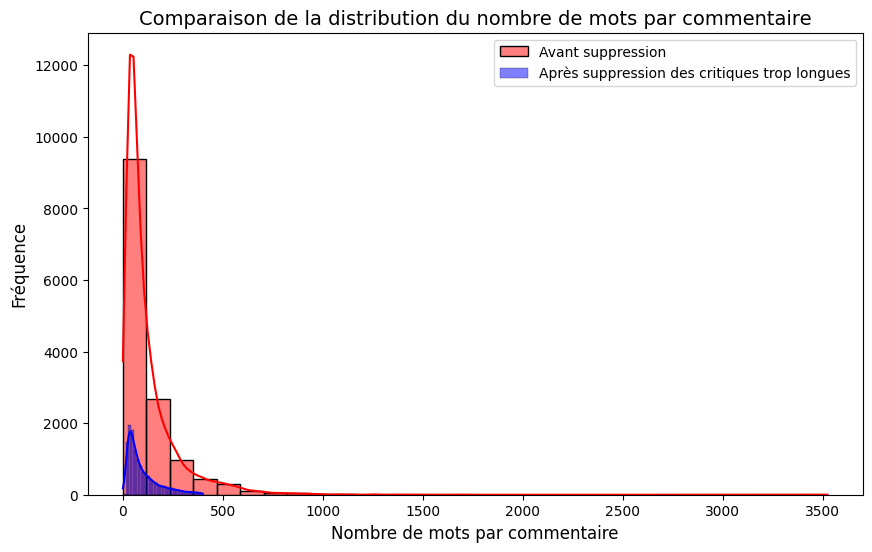

In [38]:
# new distribution
# Créer une figure pour l'histogramme comparatif
plt.figure(figsize=(10, 6))

# Histogramme de l'ancien nombre de mots (avant suppression des phrases avec URLs) en rouge
sns.histplot(old_df["old_nb_mots_commentaire"], bins=30, kde=True, color="red", edgecolor="black", label="Avant suppression", alpha=0.5)

# Histogramme du nouveau nombre de mots (après suppression) en bleu
sns.histplot(df["nb_mots_commentaire"], bins=30, kde=True, color="blue", edgecolor="black", label="Après suppression des critiques trop longues", alpha=0.5)

# Ajouter des titres et labels
plt.title("Comparaison de la distribution du nombre de mots par commentaire", fontsize=14)
plt.xlabel("Nombre de mots par commentaire", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend()

# Afficher le graphique
plt.savefig('img/taille_critiques.png')
plt.show()


In [39]:
df.drop(columns=['old_nb_mots_commentaire'], inplace=True)
del old_df

In [40]:
df.describe()

,note,nb_mots_commentaire
count,13268.000000,13268.000000
mean,2.905713,98.746533
std,1.377660,82.478360
min,0.500000,0.000000
25%,2.000000,39.000000
50%,3.000000,68.000000
75%,4.000000,132.000000
max,5.000000,400.000000


# Extract Sentiment

In [41]:
def getSentiment(note):
    if note <= 2.5:
        return 0 # negatif
    return 1 # positif

df['sentiment'] = df['note'].map(getSentiment)
df.head()

,note,contenu,titre,nb_mots_commentaire,sentiment
0,5.0,Oh my God ! Ce film est le meilleur que j'ai j...,Four Good Days,126,1
1,3.5,Drame familial lié à la drogue ça aurait pu êt...,Four Good Days,47,1
2,2.5,La bonne interprétation des actrices principal...,Four Good Days,27,0
3,3.0,C'est l'apparente sincérité des dialogues qui ...,Four Good Days,28,1
4,3.5,J’ai toujours eu une tendresse particulière po...,Four Good Days,110,1


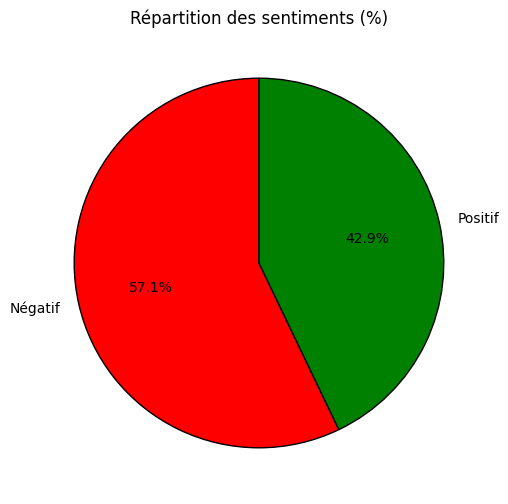

In [42]:
# Calculer la distribution des sentiments
sentiment_counts = df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%)")

# Afficher le graphique
plt.savefig('img/all_distribution.png')
plt.show()



# Split train - test - validation

In [43]:
df.drop(columns=['titre', 'nb_mots_commentaire'], inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

# Step 1: Split df into train (60%) and temp (40%) with stratification
train_df, temp_df = train_test_split(df, test_size=0.4, stratify=df["sentiment"], random_state=42)

# Step 2: Split temp into validation (20%) and test (20%) with stratification
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["sentiment"], random_state=42)

# Display dataset sizes
print(f"Train set size: {len(train_df)} (Sentiment distribution: {train_df['sentiment'].value_counts(normalize=True)})")
print(f"Validation set size: {len(val_df)} (Sentiment distribution: {val_df['sentiment'].value_counts(normalize=True)})")
print(f"Test set size: {len(test_df)} (Sentiment distribution: {test_df['sentiment'].value_counts(normalize=True)})")

Train set size: 7960 (Sentiment distribution: 1    0.571106
0    0.428894
Name: sentiment, dtype: float64)
Validation set size: 2654 (Sentiment distribution: 1    0.571213
0    0.428787
Name: sentiment, dtype: float64)
Test set size: 2654 (Sentiment distribution: 1    0.571213
0    0.428787
Name: sentiment, dtype: float64)


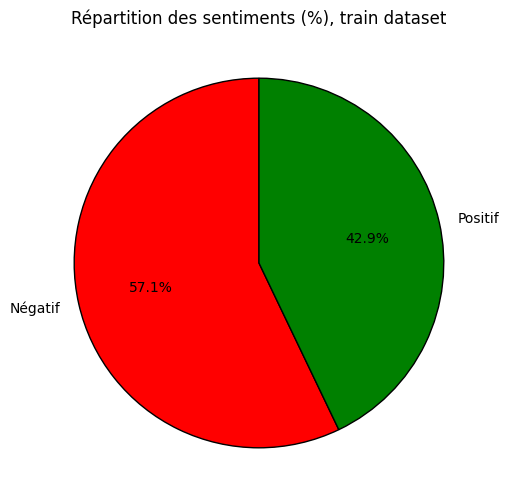

In [45]:
# Calculer la distribution des sentiments
sentiment_counts = train_df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%), train dataset")

# Afficher le graphique
plt.savefig('img/train_distribution.png')
plt.show()



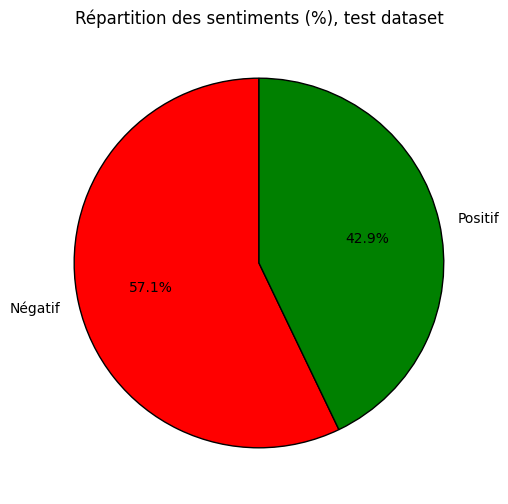

In [46]:
# Calculer la distribution des sentiments
sentiment_counts = test_df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%), test dataset")

# Afficher le graphique
plt.savefig('img/test_distribution.png')
plt.show()




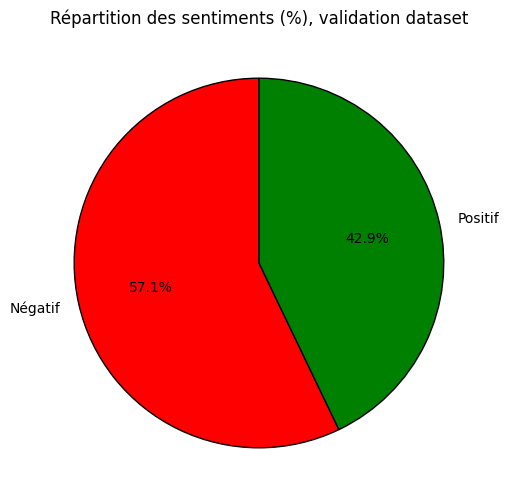

In [47]:
# Calculer la distribution des sentiments
sentiment_counts = val_df["sentiment"].value_counts(normalize=True) * 100  # Convertir en pourcentage

# Création du camembert (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts, 
    labels=["Négatif", "Positif"], 
    autopct="%1.1f%%",  # Affichage des pourcentages avec 1 décimale
    colors=["red", "green"],  # Couleurs : rouge pour négatif, vert pour positif
    startangle=90,  # Commencer à 90° pour un meilleur visuel
    wedgeprops={"edgecolor": "black"}  # Bordures noires pour améliorer la lisibilité
)

# Ajouter un titre
plt.title("Répartition des sentiments (%), validation dataset")

# Afficher le graphique
plt.savefig('img/val_distribution.png')
plt.show()


In [48]:
# Save datasets to CSV files
train_df.to_csv("final_dataset/train.csv", index=False, header=True, sep='~')
val_df.to_csv("final_dataset/val.csv", index=False, header=True, sep='~')
test_df.to_csv("final_dataset/test.csv", index=False, header=True, sep='~')